# Executing the Quantum Circuits:


# Execute( ) : 

To run the quantum circuit on simulator or real device(IBM quantum backend )

Reference: https://qiskit.org/documentation/apidoc/execute.html

1. Execution : asynchronous
2. Returns: Job instance 

# Execute ( ):  parameters used in the following example:
1. backend i.e ideal or real qasm simulator
2. experiment i.e quantum circuit
3. shots i.e number of times the circuit is run

## Examples:
1. Execute on qasm
2. Execute on real device
3. [Alternative method](#Alt_method):
    transpile and run method
4. <a href="./Execute_parameters.ipynb">Using other parameters from the execute method</a>

In [1]:
from qiskit import QuantumCircuit, Aer,execute, IBMQ
from qiskit.visualization import plot_histogram


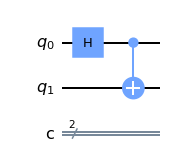

In [2]:
## Sample Program: Bell Circuit

qc=QuantumCircuit(2,2) # 2 qubits and 2 classical bits
qc.h(0)
qc.cx(0,1)
qc.draw(output="mpl")

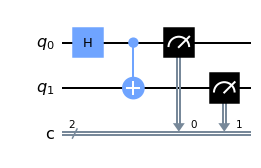

In [3]:
qc.measure([0,1],[0,1])
qc.draw(output="mpl")

### Steps for the execution:
    1. get the backend
    2. use the execute function :QuantumCircuit,backend info,shots
    3. obtain the result data using the result()
    4. extract the counts from the result data using get_counts()

### Experiment Results: result and counts
Reference:
1. https://qiskit.org/documentation/apidoc/result.html
2. https://qiskit.org/documentation/stubs/qiskit.result.Result.get_counts.html

get_counts() from result: histogram data of the experiment

### shots is the number of times experiment is run
-  By default: 1024

***
# Execution on the qasm simulator
***

In [4]:
backend=Aer.get_backend('qasm_simulator')

job=execute(qc,backend,shots=1024)

result=job.result()

counts=result.get_counts()

print(counts)

{'00': 502, '11': 522}


### NOTE: Since it's a noise-free backend we get 00 and 11

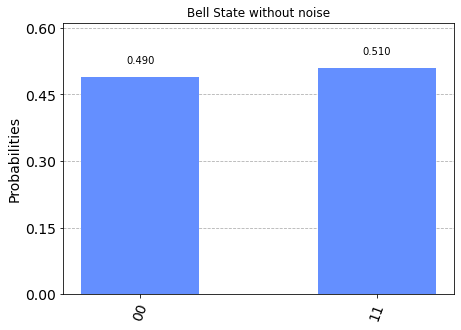

In [5]:
plot_histogram(counts,title="Bell State without noise")

***
# Execution on the Real Backend
***

NOTE: since the real backend device are noisy we would get counts for 01 and 10

In [6]:
#Load the  account
provider=IBMQ.load_account() 

#List all the available backends for the account
#provider.backends()

In [7]:
#Get the backend
backend=provider.get_backend('ibmq_bogota')

#Execute the circuit on the backend

job=execute(qc,backend,shots=1024)

In [8]:
#job.cancel()

In [9]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [10]:
from qiskit.tools import job_monitor

job_monitor(job)

Job Status: job has successfully run


In [11]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [12]:
result=job.result()

counts=result.get_counts()

print(counts)

{'00': 490, '01': 41, '10': 44, '11': 449}


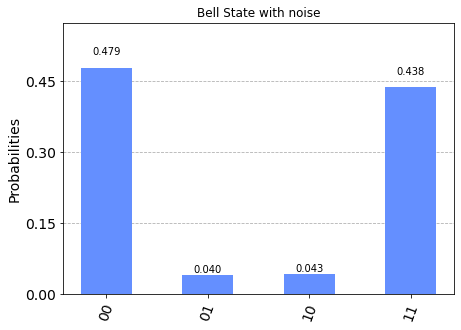

In [13]:
plot_histogram(counts,title="Bell State with noise")

In [14]:
job.job_id()

'61e93e9c4eebdaf6f07a7ff5'

# <a id="Alt_method">Alternative method:</a>
Reference : https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq
        
        1. Map the circuit using transpile
        2. Send to the backend instance using run()

## transpile:

https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html#qiskit.compiler.transpile

https://qiskit.org/documentation/tutorials/circuits_advanced/04_transpiler_passes_and_passmanager.html

<a href="./transpile.ipynb"> Transpile</a>

### transpile circuit with the backend=ibmq_qasm_simulator

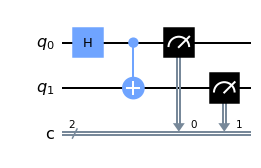

In [15]:
from qiskit.compiler import transpile

backend=provider.get_backend('ibmq_qasm_simulator')

transpile_circuit=transpile(qc,backend)

transpile_circuit.draw(output="mpl")


### transpile circuit with the backend=ibmq_bogota

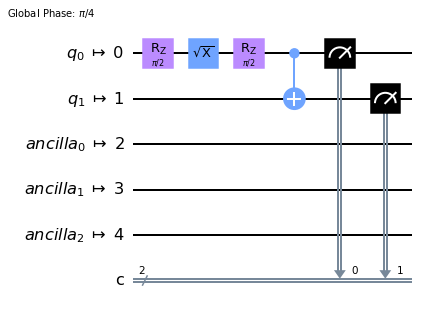

In [16]:
from qiskit.compiler import transpile,assemble

backend=provider.get_backend('ibmq_bogota')

transpile_circuit=transpile(qc,backend)

transpile_circuit.draw(output="mpl")

In [17]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

***
# run ():runs on the backend
***

## We can use the run method to execute the experiments on backend

## IMP Note: run method does not transpile the circuit 
    
Reference: https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackend.html

In [18]:
backend=provider.get_backend('ibmq_bogota')

transpile_circuit=transpile(qc,backend)

job=backend.run(transpile_circuit)

In [19]:
job.status()

<JobStatus.VALIDATING: 'job is being validated'>

In [20]:
job_monitor(job)

Job Status: job has successfully run


In [21]:
result=job.result()
counts=result.get_counts()
print(counts)

{'00': 1908, '01': 174, '10': 135, '11': 1783}


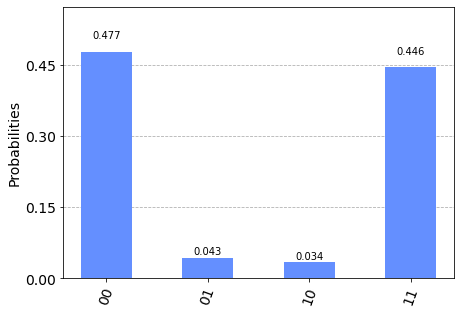

In [22]:
plot_histogram(counts)